In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')
#plt.style.use('ggplot')

C:\Users\allad\AppData\Local\Temp\ipykernel_2656\228084162.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


 <h3>Посмотрим, содержит ли датасет пустые ячейки<h3>

In [ ]:
url = "./Avocado_HassAvocadoBoard_20152023v1.0.1.csv"
avocado_data = pd.read_csv(url)
avocado_data.isna().sum()

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

In [ ]:
avocado_data.duplicated().sum()#check if there are any duplicates

0

In [ ]:
avocado_data.head()#look at first rows

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


<h3>Посмотрим объемы авокадо<h3>

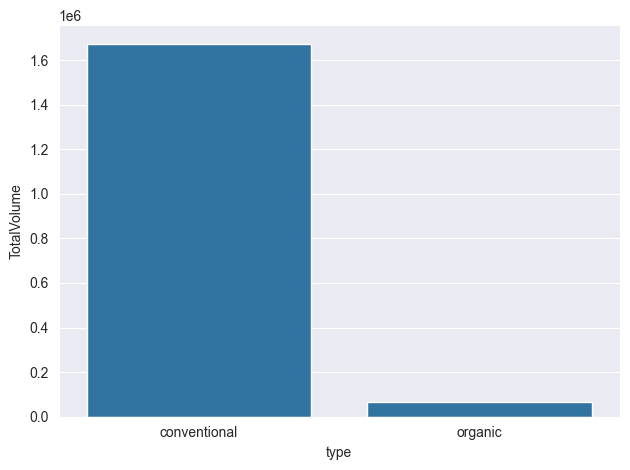

In [ ]:
spotify_green = "#1DB955"
sns.barplot(data=avocado_data, x = 'type',order=sorted(avocado_data['type'].unique()),
             y = 'TotalVolume',errorbar=None)
plt.tight_layout()
plt.show()

<h3>Рассмотрим разброс значений<h4>

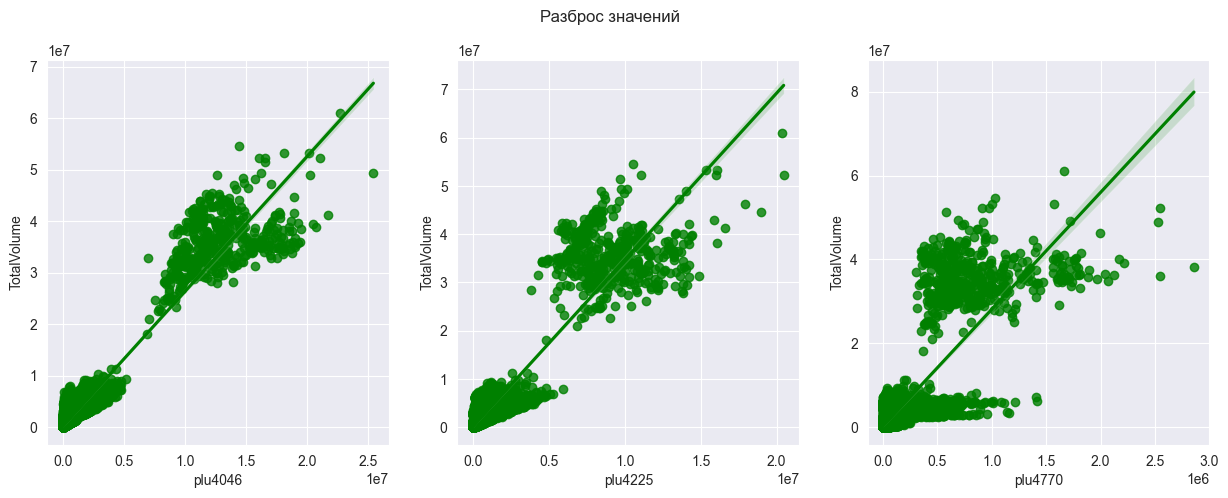

In [ ]:
cols = ['plu4046', 'plu4225','plu4770']
fig, ax = plt.subplots(1,3,figsize=(15,5))
for count, col in enumerate(cols):
    sns.regplot(data=avocado_data,x=col, y='TotalVolume', ax=ax[count], color='green')
plt.suptitle('Разброс значений')
plt.show()

In [ ]:
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])
avocado_data['Year'] = avocado_data['Date'].dt.year
avocado_data['Month'] = avocado_data['Date'].dt.month

avocado_data.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region,Year,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,2015,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,2015,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta,2015,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta,2015,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington,2015,1


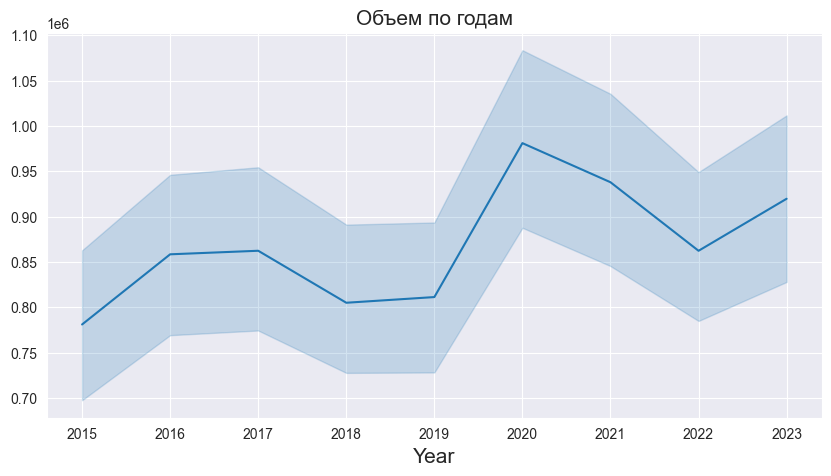

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=avocado_data['Year'],y=avocado_data['TotalVolume'])
ax.set_title('Объем по годам',fontsize=15)
ax.set_xlabel('Год ',fontsize=15)
ax.set_ylabel('')
plt.show()

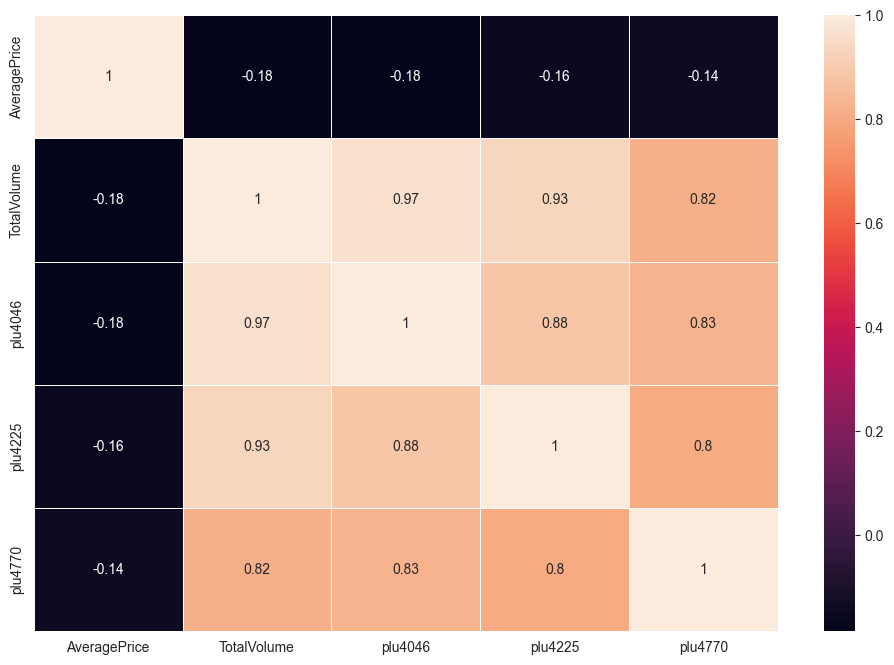

In [ ]:
cols=[ 'AveragePrice','TotalVolume','plu4046', 'plu4225','plu4770' ]
correlation_matrix = avocado_data[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,  linewidths=.5)
plt.show()